In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
data = pd.read_csv('IRIS.csv')

In [8]:
# Data Looking
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nStatistical Summary:")
print(data.describe())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Statistical Summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.0

In [9]:
# Check missing values
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [10]:
# Check unique classes in target column
print("\nTarget column classes:")
print(data.iloc[:, -1].value_counts())


Target column classes:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


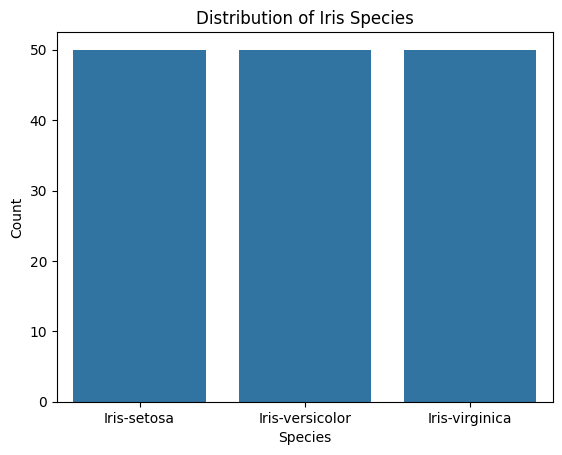

In [11]:
# dataset already clean and clear
#now next visualization
# This plot shows the distribution of different Iris flower species in the dataset.
sns.countplot(x=data.iloc[:, -1], data=data)
plt.title("Distribution of Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

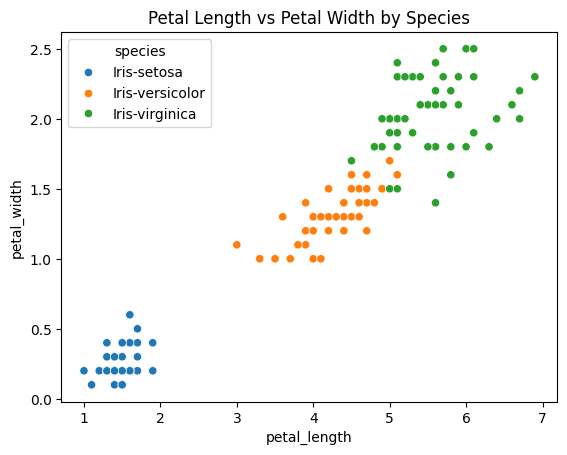

In [16]:
# This scatter plot shows how petal measurements vary across different Iris species.
sns.scatterplot(
    x=data['petal_length'],
    y=data['petal_width'],
    hue=data.iloc[:, -1],
    data=data
)
plt.title("Petal Length vs Petal Width by Species")
plt.show()

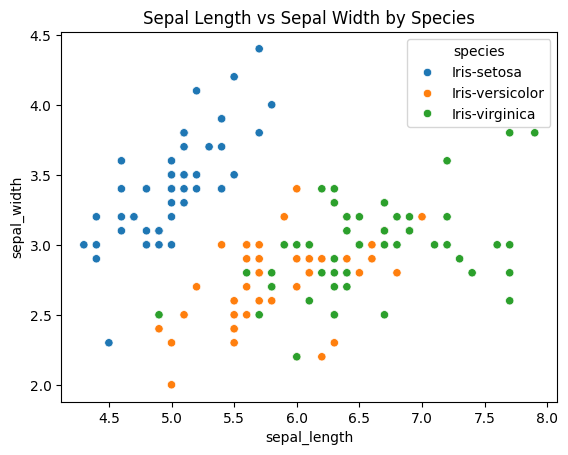

In [17]:
# This plot visualizes the relationship between sepal measurements for different species.
sns.scatterplot(
    x=data['sepal_length'],
    y=data['sepal_width'],
    hue=data.iloc[:, -1],
    data=data
)
plt.title("Sepal Length vs Sepal Width by Species")
plt.show()


In [18]:
# Separating input features and target variable
# Features (X) and Target (y)
X = data.drop('species', axis=1)
y = data['species']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (150, 4)
Target shape: (150,)


In [19]:
# Encoding target labels into numeric form
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Encoded classes:", le.classes_)


Encoded classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [20]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [24]:
# Training Logistic Regression model for Iris flower classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
model = LogisticRegression(max_iter=200)

# Train model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Displaying precision, recall, and F1-score for each class
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))



Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


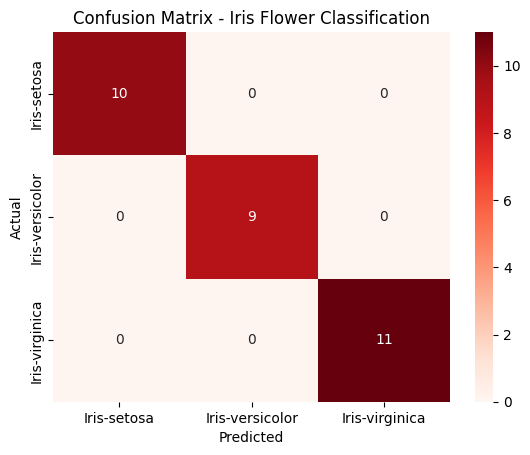

In [26]:
# Visualizing the confusion matrix to evaluate model performance
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Iris Flower Classification")
plt.show()
